# Eksplorativna analiza podataka
#### kurs primenjene nauke o podacima, fakultet FEFA, 2020. godine

Ovo je primer eksplorativne analize skupa podataka sa kojim se prvi put susrećemo. U tu svrhu ćemo koristiti fajl __fortune500.csv__ koji možete da preuzmete sa adrese https://s3.amazonaws.com/dq-blog-files/fortune500.csv. Neke elemente analize ćemo uraditi u R-u (primer za skriptnu obradu), a za domaći zadatak probajte da to uradite u Excel-u (primer za _spreadsheet_ obradu podataka).

Ideja eksplorativne analize podataka (skraćeno EDA od engl. _Exploratory Data Analysis_) je da:
* istraži strukturu podataka (koliko ima podataka, kog, tipa, šta su atributi),
* uoči nedostajuće podatke i očigledne greške,
* uoči raspodele podataka i proceni njene parametre,
* omogući skiciranje modela odnosa među varijablama i
* omogući identifikovanje ključnih varijabli. 

Ovu analizu je najbolje raditi istovremeno i numerički i vizuelno.

Prvo, da učitamo fortune500 csv fajl direktno sa veba. Nema potrebe da ga preuzimamo i snimamo na lokalni disk. Sadržaj fajla smeštamo u *data frame* koji ćemo kreativno nazvati **df**.

In [177]:
df=read.csv("https://s3.amazonaws.com/dq-blog-files/fortune500.csv")

Koje su dimenzije ove tabele?

In [178]:
dim(df)

[1] 25500     5

Koju strukturu ima __df__?

In [179]:
str(df)

'data.frame':	25500 obs. of  5 variables:
 $ Year                 : int  1955 1955 1955 1955 1955 1955 1955 1955 1955 1955 ...
 $ Rank                 : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Company              : Factor w/ 1887 levels "3Com","3M","A-T-O",..: 724 618 1727 718 607 369 145 787 1171 561 ...
 $ Revenue..in.millions.: num  9824 5661 3250 2959 2511 ...
 $ Profit..in.millions. : Factor w/ 6977 levels "-0.1","-0.2",..: 6486 5688 2940 3143 2864 2733 1341 2774 2787 4313 ...


25500 redova je mnogo za ispis na ekranu. Da pogledamo kako izgleda zaglavlje **df** sa prvih nekoliko redova.

Vidimo da _data frame_ ima 5 atributa. Prve dve ("Year" i "Rank") su celobrojni numerički vektori, treća ("Company") je faktor, odnosno čudno spakovan niz stringova, četvrto ("Revenue..in.millions.") je numerički vektor (niz brojeva) dok je poslednji atribut ponovo faktor. Ovo je malo iznenađenje jer smo očekivali još jedan numerički vektor. Izgleda da u toj koloni ima još nečega sem brojeva.

Za svaku kolonu iz __df__ možemo da vidimo osnovne elemente deskriptivne statistike (srednja vrednost (_mean_), medijana (_median_), minimum, maksimum i 1. i 3. kvartil) uz pomoć funkcije `summary`.

In [180]:
summary(df$year)

Length  Class   Mode 
     0   NULL   NULL 

Sad da vidimo same podatke. 25500 redova je mnogo. Prikazaćemo za početak samo zaglavlje i prvih pet redova uz pomoć funkcije `head`.

In [181]:
head(df)

Year,Rank,Company,Revenue..in.millions.,Profit..in.millions.
1955,1,General Motors,9823.5,806
1955,2,Exxon Mobil,5661.4,584.8
1955,3,U.S. Steel,3250.4,195.4
1955,4,General Electric,2959.1,212.6
1955,5,Esmark,2510.8,19.1
1955,6,Chrysler,2071.6,18.5


Imena poslednja dva atributa su malo nezgrapna. Preimenovaćemo ih u nešto jednostavnije.

In [182]:
names(df)=c("year","rank","company","revenue","profit")

Podaci su dati po godinama. Koje godine imamo u ovoj tabeli?

In [183]:
unique(df$year) # unique nam daje samo jedinstvene vrenosti, bez ponavljanja

[1] 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969
[16] 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984
[31] 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999
[46] 2000 2001 2002 2003 2004 2005

Imamo, dakle, 51 godinu. Koliko je to redova podataka po godini?

In [184]:
table(df$year)


1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 
 500  500  500  500  500  500  500  500  500  500  500  500  500  500  500  500 
1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 
 500  500  500  500  500  500  500  500  500  500  500  500  500  500  500  500 
1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 
 500  500  500  500  500  500  500  500  500  500  500  500  500  500  500  500 
2003 2004 2005 
 500  500  500 

Za svaku godinu po 500 redova, verovatno 500 različitih kompanija. Onih 25500 redova je baš 51·500.

Pošto podaci nisu anotirani, nije sasvim jasno šta znači "rank". Ili su pojedinačni unosi rangirani ili su kompanije, ali ne znamo po čemu? Po profitu ili prihodima?
Da vidimo u kom intervalu imamo vrednosti za **rank**.

In [185]:
min(df$rank); max(df$rank)

[1] 1

[1] 500

Verovatno je rangirano 500 kompanija svake godine. Koliko imamo ukupno različitih kompanija?

In [186]:
length(unique(df$company))

[1] 1887

Više ih je od 500. Izgleda da za svaku godinu imamo listu 500 kompanija koje nisu nužno iste. 

Koliko ima kompanija po godinama?

Da vidimo koje se kompanije načešće pojavljuju u tabeli. Funkcija `table` će nam dati sve kompanije. Bolje je da ih sortiramo (funkcijom `sort`) pa da onda prikažemo samo nekoliko prvih uz pomoć `head` funkcije.

In [187]:
head(sort(table(df$company)))


       ACX Technologies  ADC Telecommunications Adelphia Communications 
                      1                       1                       1 
            Allen Group       Amalgamated Sugar        AMBAC Industries 
                      1                       1                       1 

Nije dovoljno dobro. Ovde smo dobili one koje se pojavljuju samo jednom jer `sort` slaže podatke od najmanjeg do najvećeg. Biće bolje da umesto `head` uzmemo `tail` i tako umesto zaglavlja prokažemo sam kraj tabele.

In [188]:
tail(sort(table(df$company)))


         USG Weyerhaeuser    Whirlpool        Wyeth    OfficeMax          CBS 
          51           51           51           51           55           57 

Aha, jasno. Firme "USG" i "Weyerhaeuser" se pojavljuju svake godine, ukupno 51 put. Ali, ne! "CBS" se pojavljuje 57 puta! Nemoguće! Imamo samo 51 godinu. Da li znači da ista firma može da se pojavi više puta u istoj godini?

In [189]:
df$year[df$company=="CBS"]

[1] 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969
[16] 1970 1971 1972 1972 1973 1973 1974 1974 1975 1975 1976 1976 1977 1977 1978
[31] 1978 1979 1979 1980 1980 1981 1981 1982 1983 1984 1985 1986 1987 1988 1989
[46] 1990 1991 1992 1993 1994 1995 1995 1996 1997 1998 1999 2000

In [190]:
table(df$year[df$company=="CBS"])


1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 
   1    2    2    2    2    2    2    2    2    2    2    1    1    1    1    1 
1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 
   1    1    1    1    1    1    1    1    2    1    1    1    1    1 

Zaista, u godinama 1972-1981. i kasnije 1995. imamo po dva CBS-a. Očigledno to sme. Nije zabranjeno da postoje dve kompanije sa istim imenom u raličitim zemljama, pogotovo ako je to skraćenica. Šteta što ne postoje metapodaci da vidimo koje su to firme. Svejedno, zaključujemo da **naziv kompanije nije jedinstven**.

Imamo previše varijabli da sve podatke odjednom prikažemo. Možemo da prikažemo npr. prihode kompanija za jednu odabranu godinu, npr. 2005. Najbolje je uzmemo samo podskup koji se odnosi na tu godinu.

In [191]:
df2005=subset(df,df$year==2005)

Dimenzije ovog manjeg skupa su naravno 500 puta 5.

In [192]:
dim(df2005)

[1] 500   5

Sad možemo da prikažemo prihod po kompanijama. Koristimo trakasti dijagram, tj. _horizontal bar chart_. Parametar **las** je tu zbog orijentacije oznaka.

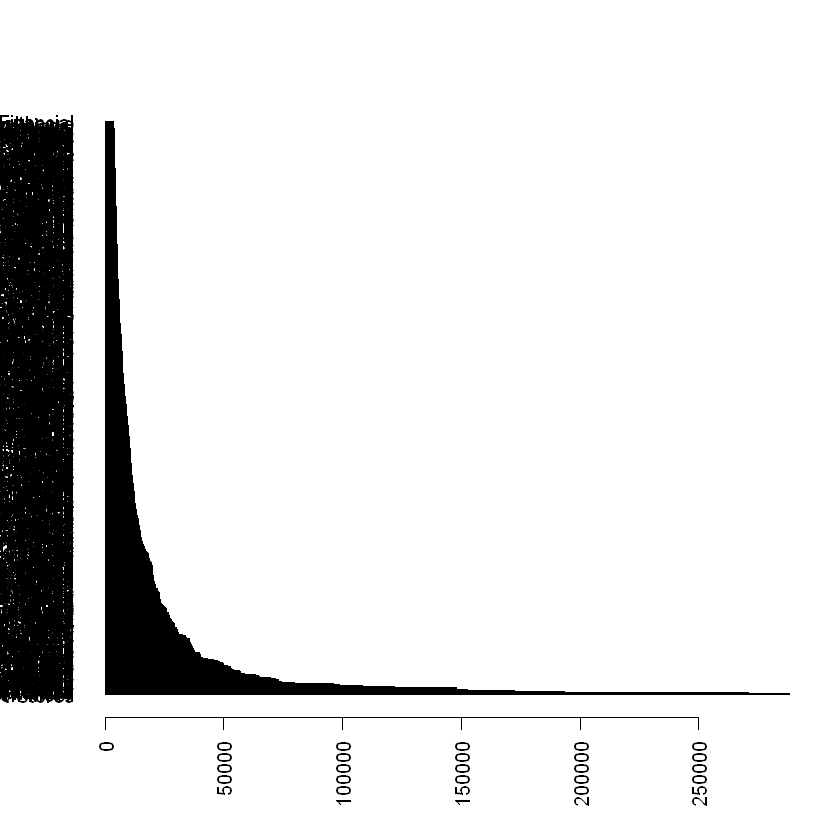

In [193]:
barplot(df2005$revenue,names=df2005$company,horiz=T,las=2)

Ovo je krajnje nepregledno. Ipak, vidi se nešto interesantno. Niz je sortiran. Pošto crtanje ovog grafika kreće odozdo, to znači da je __niz sortiran po prihodu i da počinje od kompanije sa najvećim prihodom__. Što se preglednosti tiče, ne može svih 500 kompanija na jedan grafik. Uzećemo samo prvih 10. Uvešćemo još jedan _data frame_ za to: __df2005top__. Mali je problem što ne znamo u kojim je ovo jedinicama dato. Svejedno, zgodno je za poređenje.

In [194]:
df2005top=head(df2005,10)

Da probamo sad da nacrtamo dijagram. Funkcija `text` je tu da prikaže nazive kompanija malo preglednije nego u prethodnom pokušaju.

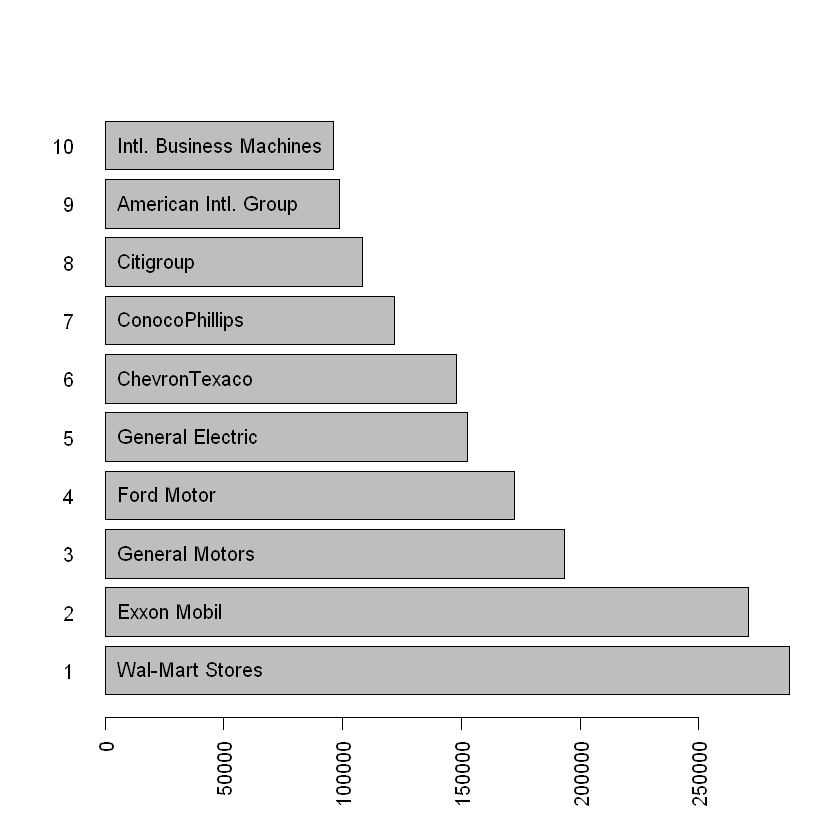

In [195]:
y=barplot(df2005top$revenue,names=df2005top$rank,horiz=T,las=2)
text(0,y,df2005top$company,pos=4)

Vidi se da je __rank__ zapravo pozicija kompanije na listi kompanija sa najvećim prihodom. (Ako vam se ne sviđa što je grafikon _up-side-down_, obrnite sami redosled. Funkcija koja vam može pomoći je `rev`.) 

Sad bismo mogli da pogledamo kako su se menjali prihodi po godinama.

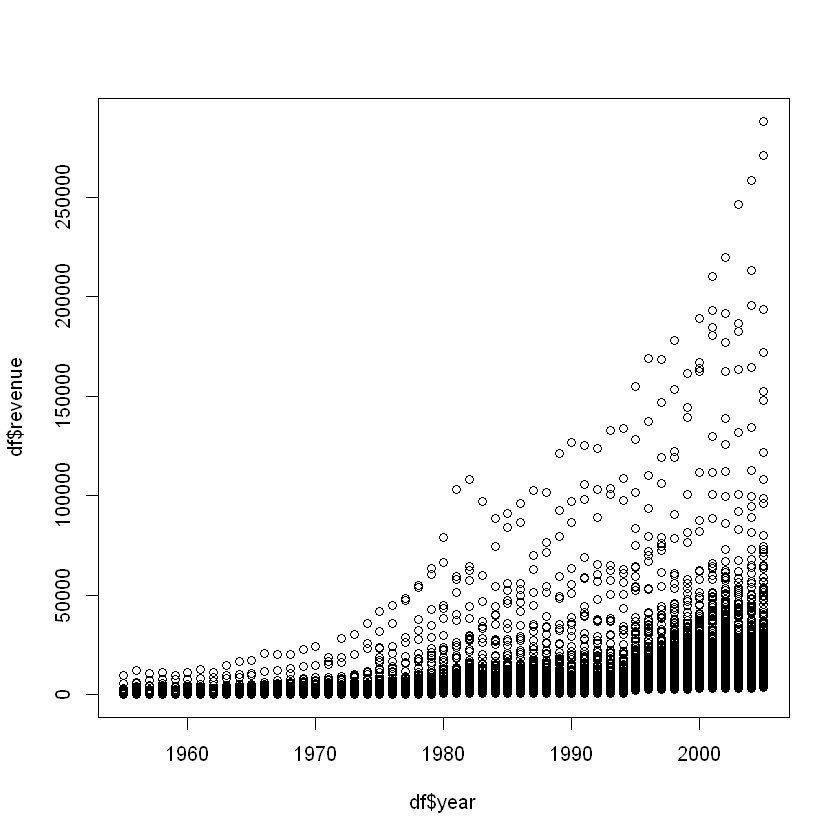

In [196]:
plot(df$year,df$revenue)

Očigledno je da je prihod 500 najvećih kompanija eksponencijalno rastao u ovih pet decenija. Isto tako, vidimo i da su velike razlike između nekoliko prvih i "onih običnih" iz top 500. Možda bi imalo više smisla prikazati ovaj grafik na logaritamskoj skali za prihode, tj. y-osu. Još bolje, da nađemo prihod tipične kompanije iz top 500 koristeći medijanu. To ćemo na grafiku prikazati crvenom bojom.

Da bismo izračunali medijanu prihoda po godinama iskoristićemo ne baš lep, ali efikasan izraz sa `tapply`. Ako niste bliski sa R-om, samo ga izvršite. Objašnjenje bi bilo nepotrebna digresija za ovaj tekst.

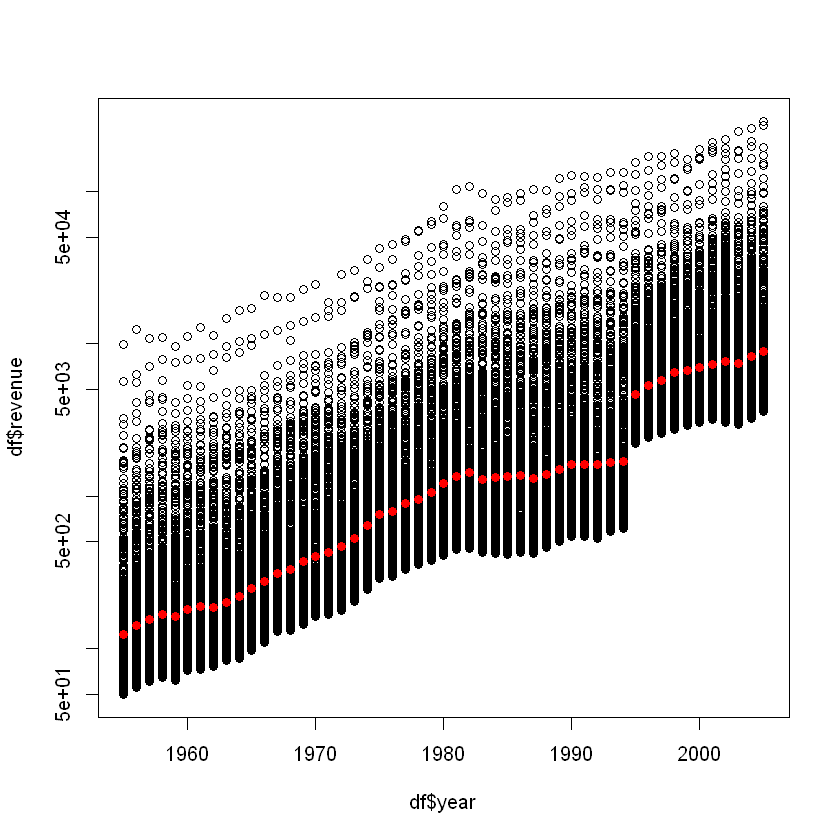

In [197]:
MedRev=tapply(df$revenue,factor(df$year),median) # MedRev je vektor u koji smeštamo medijalne vrednosti
plot(df$year,df$revenue,log="y")
points(unique(df$year),MedRev,pch=20,col="red",cex=1.5)

Nema sumnje, prihodi rastu tipičnim kompanijama iz top 500. Moramo samo da primetimo da se nešto čudno dogodilo 1995. godine: najbolje kompanije imaju očekivani rast prihoda, ali one slabije imaju značajan skok koji se vidi i na medijalnoj vrednosti.

Možemo da izaberemo i jednu kompaniju pa da ispitujemo njene podatke, npr. da prikažemo kako su se menjali prihodi od 1955. do 2005. godine. Uzećemo za primer prvu kompaniju iz tabele, tj. onu koja je 1955. imala naveći prihod -- General Motors. To izgleda ovako:

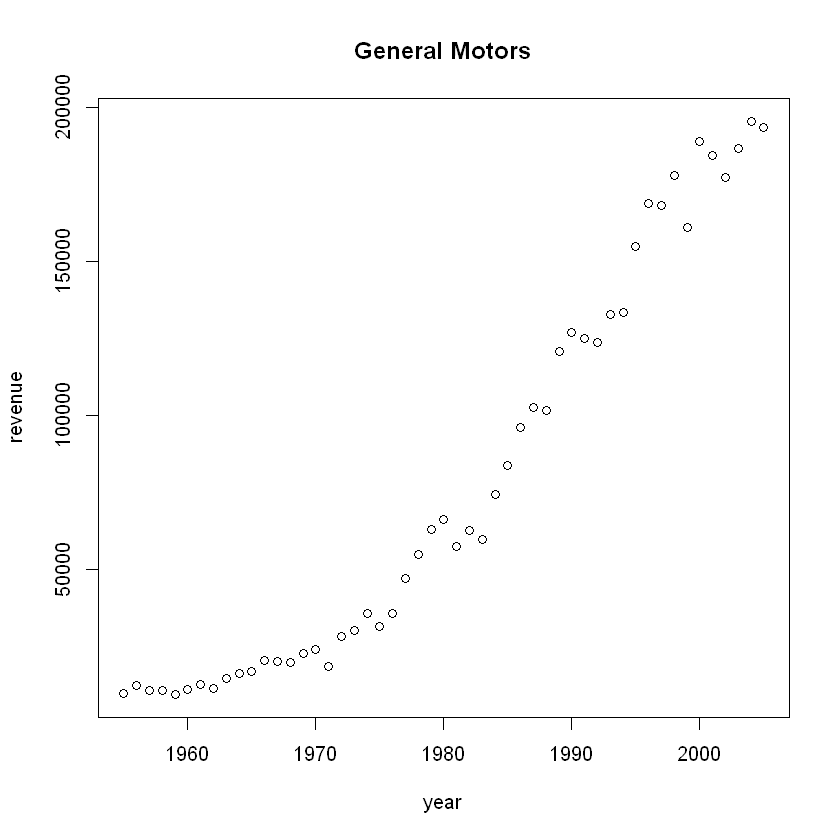

In [198]:
comp=df$company[1]
dfcomp=subset(df,df$company==comp)
plot(dfcomp$year,dfcomp$revenue,xlab="year",ylab="revenue")
title(comp)

Slično, možemo da vidimo kako se vremenom menjalo mesto na rang-listi za neke kompanije. Ovde smo za primer izabrali pet kompanija, za svaku smo napravili podskup od __df__ i linijama različite boje prikazali gde su bili koje godine. Vidimo da nisu sve kompanije postojale sve vreme. 

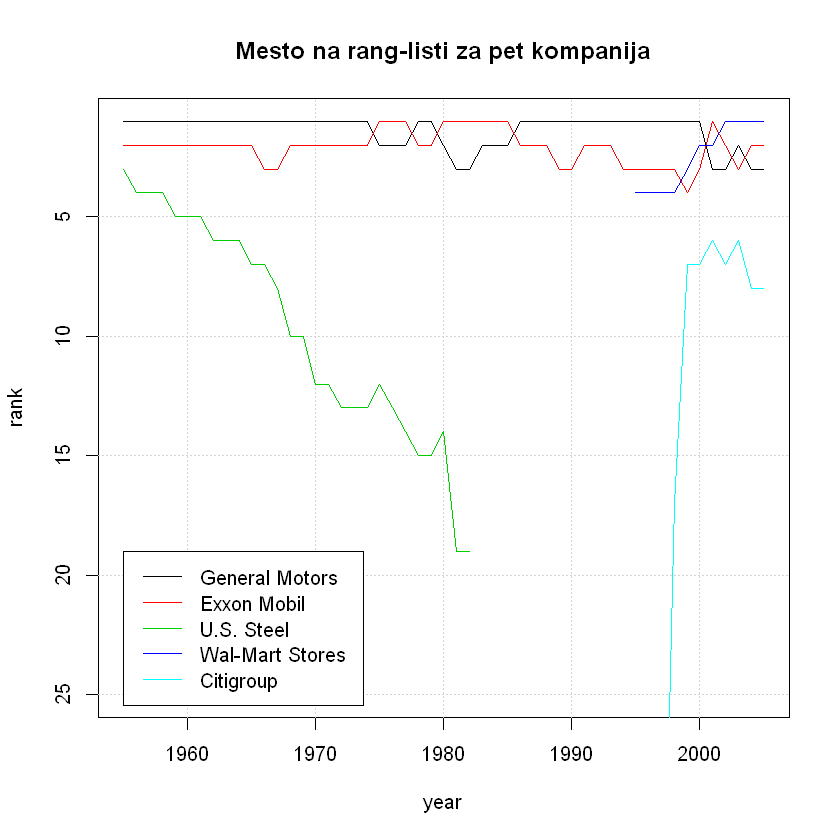

In [199]:
# pravimo tri podskupa za prve tri kompanije sa liste
comp1=as.character(df$company[1])
dfcomp1=subset(df,df$company==comp1)
comp2=as.character(df$company[2])
dfcomp2=subset(df,df$company==comp2)
comp3=as.character(df$company[3])
dfcomp3=subset(df,df$company==comp3)
# pravimo još dva podskupa za kompanije koje 1955. nisu bile značajne
comp4="Wal-Mart Stores"
dfcomp4=subset(df,df$company==comp4)
comp5="Citigroup"
dfcomp5=subset(df,df$company==comp5)

plot(dfcomp1$year,ylim=c(25,1),xlim=range(dfcomp1$year),xlab="year",ylab="rank")
grid()
#plot(dfcomp$year,dfcomp$rank,xlab="year",ylab="rank",type="o")
lines(dfcomp1$year,dfcomp1$rank,col=1)
lines(dfcomp2$year,dfcomp2$rank,col=2)
lines(dfcomp3$year,dfcomp3$rank,col=3)
lines(dfcomp4$year,dfcomp4$rank,col=4)
lines(dfcomp5$year,dfcomp5$rank,col=5)
title("Mesto na rang-listi za pet kompanija")
legend(x=1955,y=19,legend=c(comp1,comp2,comp3,comp4,comp5),col=1:5,lty=1)

Cela ova Jupyter sveska je primer kako u Jupyter okruženju i programskom jeziku R možemo da pregledamo fajl sa nepoznatim podacima. Verovatno vam je mnogo toga nejasno. Nema potrebe da sve funkcije i njihove parametre znate. Kad imate svesku kao što je ova možete da eksperimentišete, da je menjate, vidite šta se dešava i učite. Srećan rad! 